In [67]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [50]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [51]:
len(X_train)

60000

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 640x480 with 0 Axes>

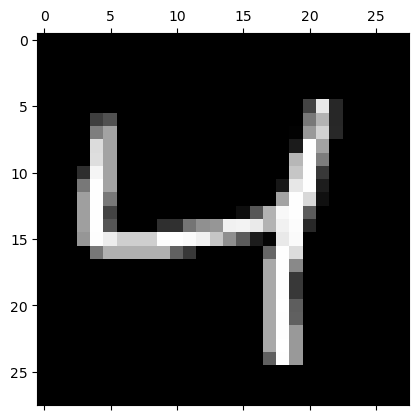

In [54]:
plt.gray()
plt.matshow(X_train[2])

In [55]:
y_train[2]

4

In [56]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [57]:
X_train=X_train/255
X_test=X_test/255

In [58]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [59]:
X_test_flattened.shape

(10000, 784)

In [60]:
print(X_train_flattened.shape)

(60000, 784)


In [61]:
X_train_flattened[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [62]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8754
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9255


In [63]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9255


[0.26758667826652527, 0.9254999756813049]

In [80]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 2ms/step


array([2.5454115e-02, 3.3760688e-07, 6.7350902e-02, 9.4727111e-01,
       2.8697462e-03, 1.0668727e-01, 1.4730866e-06, 9.9975973e-01,
       5.2559655e-02, 6.0329682e-01], dtype=float32)

In [81]:
np.argmax(y_predicted[0])

7

In [85]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [86]:
y_test[0:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [87]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    9,  936,   12,   12,    5,   13,   10,   27,    4],
       [   4,    0,   20,  921,    2,   26,    1,   10,   16,   10],
       [   1,    2,    4,    1,  934,    0,    9,    3,    5,   23],
       [   7,    2,    5,   25,   13,  791,   14,    5,   24,    6],
       [  11,    3,    6,    1,    8,   14,  912,    2,    1,    0],
       [   1,    7,   21,    8,    9,    0,    0,  947,    1,   34],
       [   7,   11,    9,   26,   10,   41,    9,   14,  834,   13],
       [  11,    7,    1,   11,   41,    8,    0,   27,    2,  901]])>

Text(50.722222222222214, 0.5, 'Truth')

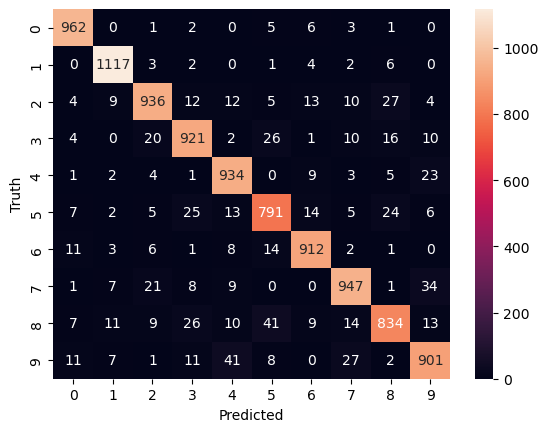

In [92]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [93]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9840


In [94]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9734


[0.089727021753788, 0.9733999967575073]

313/313 [==============================] - 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

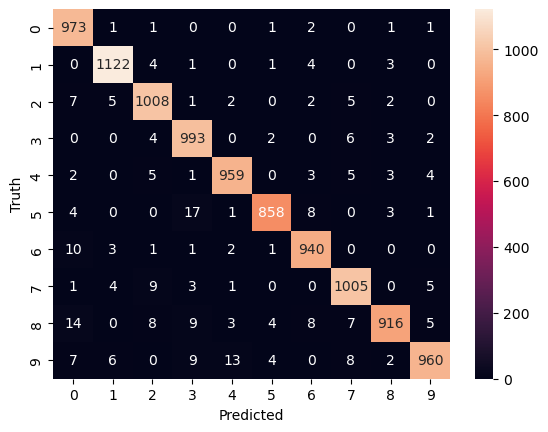

In [95]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [98]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9846


In [100]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9770


[0.07481908053159714, 0.9769999980926514]